# Dataset: CIFAR 10

> CIFAR 10


- skip_showdoc: true
- skip_exec: true

In [ ]:
#| default_exp cifar

In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

In [ ]:
from fastbook import search_images_ddg
from fastdownload import download_url
from fastai.vision.all import *
import fastcore.all as fc
from nbdevAuto import functions
import os
import glob
import shutil
import numpy as np

In [ ]:
fc.hasattrs?

Signature: fc.hasattrs(o, attrs)
Docstring: Test whether `o` contains all `attrs`
File:      ~/mambaforge/envs/cfast/lib/python3.11/site-packages/fastcore/basics.py
Type:      function

In [ ]:
# Specify the directory path
directory_path = 'Data/cifar-10-batches-py'

In [ ]:
#|exports
def show_image(im,
               ax=None,
               figsize=None,
               title=None, 
               noframe=True,
               **kwargs):
    "Show a PIL or PyTorch image on `ax`."
    if fc.hasattrs(im, ('cpu','permute','detach')):
        im = im.detach().cpu()
        if len(im.shape)==3 and im.shape[0]<5: im=im.permute(1,2,0)
    elif not isinstance(im,np.ndarray): im=np.array(im)
    if im.shape[-1]==1: im=im[...,0]
    if ax is None: _,ax = plt.subplots(figsize=figsize)
    ax.imshow(im, **kwargs)
    if title is not None: ax.set_title(title)
    ax.set_xticks([]) 
    ax.set_yticks([]) 
    if noframe: ax.axis('off')
    return ax

In [ ]:
#|exports
def get_grid(
    n:int, # Number of axes
    nrows:int=None, # Number of rows, defaulting to `int(math.sqrt(n))`
    ncols:int=None, # Number of columns, defaulting to `ceil(n/rows)`
    title:str=None, # If passed, title set to the figure
    weight:str='bold', # Title font weight
    size:int=14, # Title font size
    **kwargs,
): # fig and axs
    "Return a grid of `n` axes, `rows` by `cols`"
    if nrows: ncols = ncols or int(np.floor(n/nrows))
    elif ncols: nrows = nrows or int(np.ceil(n/ncols))
    else:
        nrows = int(math.sqrt(n))
        ncols = int(np.floor(n/nrows))
        
    fig,axs = subplots(nrows, ncols, **kwargs)
    
    for i in range(n, nrows*ncols): # ignore the extra space
        axs.flat[i].set_axis_off()
        
    if title is not None: fig.suptitle(title, weight=weight, size=size) #title settings
        
    return fig,axs

In [ ]:
#|exports
def show_images(ims:list, # Images to show
                nrows:int|None=None, # Number of rows in grid
                ncols:int|None=None, # Number of columns in grid (auto-calculated if None)
                titles:list|None=None, # Optional list of titles for each image
                **kwargs):
    "Show all images `ims` as subplots with `rows` using `titles`"
    axs = get_grid(len(ims), nrows, ncols, **kwargs)[1].flat
    
    for im,t,ax in zip_longest(ims, titles or [], axs): 
        show_image(im, ax=ax, title=t)

In [ ]:
class Image:
    def __init__(self, image, label, name, category):
        self.value = image
        self.label = label
        self.name = name
        self.category = category

    def __repr__(self):
        return np.array2string(self.value)

    @property
    def plot(self):
        show_images(self.value, titles = self.category)

class Cifar:
    def __init__(self, file_path):
        self.types = ['plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']
        self.file_path = file_path
        self.full_data = self.data_retrieve()
        self.labels = self.get_labels()
        self.images = self.get_images_data()
        self.filenames = self.get_filenames()
        
        
    def __len__(self): return len(self.images)
        
    def __getitem__(self, i): 
        if isinstance(i, int):
            slide = slice(i, i + 1)  
        elif isinstance(i, slice):
            slide = i
            
        return Image(self.images[slide],
              self.labels[slide], 
              self.filenames[slide], 
              [self.types[i] for i in self.labels[slide]])        

    def batch_label(self):
        return self.data[b'batch_label']

    def get_labels(self):
        labels = []
        for data in self.full_data:
            labels.extend(data[b'labels'])
        return labels

    def get_images_data(self):
        images = []
        for data in self.full_data:
            reshaped_array = data[b'data'].reshape(len(data[b'data']), 3, 32, 32).astype(np.uint8)
        
            # Transpose the dimensions to get the desired shape (32x32x3)
            reshaped_array = np.transpose(reshaped_array, (0, 2, 3, 1))

            images.extend(reshaped_array)
        images = np.array(images)
        return images
        
    def get_filenames(self):
        filenames = []
        for data in self.full_data:
            filenames.extend(data[b'filenames'])
        return filenames

    def data_retrieve(self):
        import pickle
        data = []
        
        # Use glob to find all files starting with 'data' in the specified directory
        matching_files = glob.glob(f'{self.file_path}/data*')
    
        # Print the list of matching files
        for files in matching_files:
            with open(files, 'rb') as fo:
                dict = pickle.load(fo, encoding='bytes')
            data.append(dict)
    
        return data
    

In [ ]:
cifar = Cifar(directory_path)

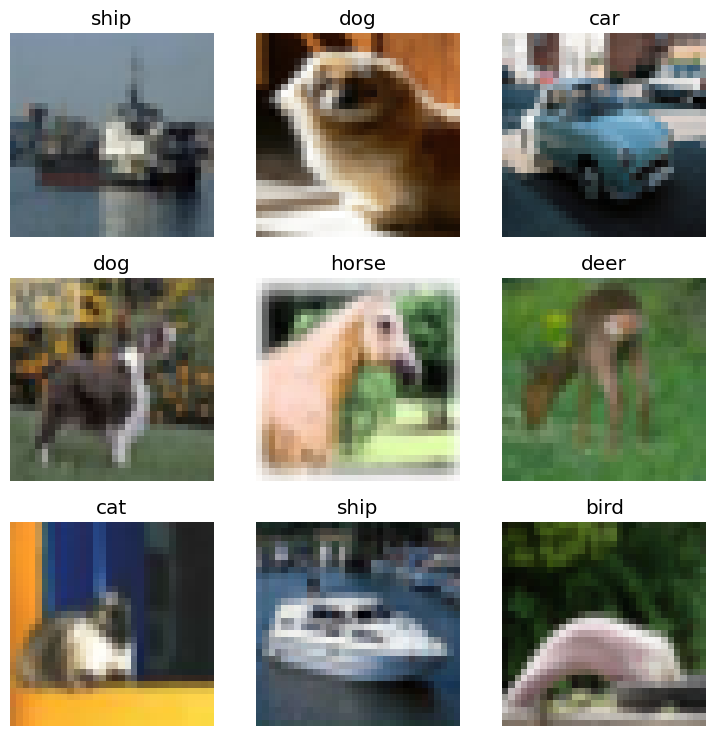

In [ ]:
cifar[1:10].plot

In [ ]:
len(cifar.full_data)

5

In [ ]:
type(cifar.labels), len(cifar.labels)

(list, 50000)

In [ ]:
type(cifar.images), len(cifar.images)

(numpy.ndarray, 50000)

In [ ]:
type(cifar.filenames), len(cifar.filenames)

(list, 50000)

In [ ]:
type(cifar.full_data[1][b'data'])

numpy.ndarray

In [ ]:
cifar.images[1].shape, type(cifar.images[1]), 

((32, 32, 3), numpy.ndarray)

In [ ]:
images = np.array(cifar.images)

In [ ]:
images.shape

(50000, 32, 32, 3)

In [ ]:
len(cifar)

50000

In [ ]:
cifar.filenames[1:10:2]

[b'icebreaker_s_001689.png',
 b'convertible_s_000520.png',
 b'broodmare_s_000313.png',
 b'true_cat_s_000886.png',
 b'ostrich_s_001561.png']

In [ ]:
type(cifar[1])

__main__.Image

In [ ]:
cifar[1:5].name

[b'icebreaker_s_001689.png',
 b'peke_s_000545.png',
 b'convertible_s_000520.png',
 b'domestic_dog_s_000455.png']

In [ ]:
cifar[1:5].category

['ship', 'dog', 'car', 'dog']

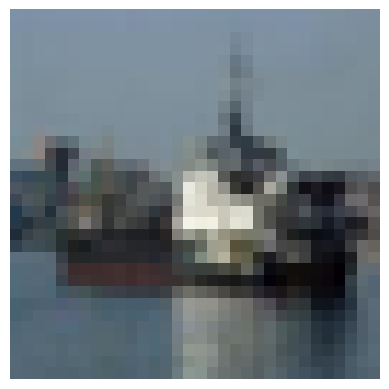

[b'icebreaker_s_001689.png']
['ship']


In [ ]:
# Display the image
plt.imshow(cifar.images[1])
plt.axis('off')  # Hide axis
plt.show()
print(cifar[1].name)
print(cifar[1].category)